In [ ]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

In [ ]:
# Load 2 data sets
app_rec = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\application_record.csv')

cre_rec = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\credit_record.csv')

In [ ]:
# Check the size of each data set
print(app_rec.shape)
print(cre_rec.shape)

# Data Exploration

In [ ]:
# To Evaluate Columns' Name:
app_rec.columns.to_list()

In [ ]:
# Print first few raws of data and check them visually:
app_rec.head(5)

In [ ]:
# To Evaluate Data Type and Size:
app_rec.info()

In [ ]:
print(app_rec.CODE_GENDER.unique())
print(app_rec.FLAG_OWN_CAR.unique())
print(app_rec.FLAG_OWN_REALTY.unique())
print(app_rec.NAME_INCOME_TYPE.unique())
print(app_rec.NAME_EDUCATION_TYPE.unique())
print(app_rec.NAME_FAMILY_STATUS.unique())
print(app_rec.NAME_HOUSING_TYPE.unique())

# Create a for loop for visualization of frequency of items in each aforementioned columns
for var in ["CODE_GENDER","FLAG_OWN_CAR",	"FLAG_OWN_REALTY", 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE',   'NAME_FAMILY_STATUS',  'NAME_HOUSING_TYPE']:
    # countplt, ax = plt.subplots(figsize = (10,7))
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    ax = sns.countplot(x =var, data = app_rec)
    ax.set_title(var,fontsize = 18, fontweight='bold' )
    ax.bar_label(ax.containers[0])
    ax.set_xlabel(var, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)
    plt.show()

In [ ]:
#Check the Numeric fields
app_rec.describe().T

In [ ]:
for var in ['CNT_CHILDREN']:  # It doenot have so much variables range!
    countplt, ax = plt.subplots(figsize = (10,7))
    plt.rcParams["figure.figsize"] = [10, 7]
    plt.rcParams["figure.autolayout"] = True
    ax =  sns.countplot(x=var, data = app_rec)
    ax.set_title(var,fontsize = 18, fontweight='bold' )
    ax.bar_label(ax.containers[0])
    ax.set_xlabel(var, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)
    plt.show()

# My Graphs does not work correctly. Question from Saee: WHat I should do for th barplot?

In [ ]:
for var in ['AMT_INCOME_TOTAL',  'DAYS_EMPLOYED']:   # These 2 columns have a whide range of numerical values!
    # countplt, ax = plt.subplots(figsize = (10,7))
    plt.rcParams["figure.figsize"] = [18, 5]
    plt.rcParams["figure.autolayout"] = True
    ax.set(yscale="log")
    ax =  sns.boxplot(app_rec[var])
    # ax.set(yscale="log")
    ax.set_title(var,fontsize = 18, fontweight='bold' )
    # ax.bar_label(ax.containers[0])
    ax.set_xlabel(var, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)
    plt.show()

In [ ]:
#Check Dublicate rows
app_rec.duplicated().sum()

We do not have any dublicated rows. However, we have dublicated IDs:

In [ ]:
app_rec.ID.duplicated().sum()

In [ ]:
# filter the data to find and evaluate rows with duplicated rows:
app_rec_dup_ID = app_rec[app_rec['ID'].duplicated(keep=False) == True].sort_values(by=['ID']).reset_index(drop=True)
app_rec_dup_ID

Due to the sensitivity of the dublication in ID, as a key, I decided to drop all rows with dublicated IDs.(please see the Cleaning part)

In [ ]:
#check Missing Values
app_rec.isnull().sum()

In [ ]:
# Check the OCCUPATION_Type:

# print("Number of Missing Values:", app_rec.OCCUPATION_TYPE.isnull().sum())
# app_rec.OCCUPATION_TYPE.value_counts()

app_rec.OCCUPATION_TYPE.value_counts(dropna = False)  # The same as above but much more efficient!


# Data Cleaning

In [ ]:
# Change the data type of the 'ID' to string data type:
columns = ['ID']#,'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
for column in columns:
    app_rec[column] = app_rec[column].astype(str)
    
print(app_rec["ID"].dtypes)

In [ ]:
# We can assign "Other" for null values. 
app_rec["OCCUPATION_TYPE"].fillna("Other", inplace = True)

In [ ]:
#Remove the duplicates values for IDs:
app_rec = app_rec.drop_duplicates(subset=['ID']).reset_index(drop=True)

In [ ]:
# Replace any positive value of DAYS_EMPLOYED with 0:
app_rec['DAYS_EMPLOYED'] = app_rec['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else x)

# Feature Engineering

In [ ]:
# Create month_employed from DAYS_EMPLOYED.
app_rec["MONTH_EMPLOYED"] = (app_rec["DAYS_EMPLOYED"]/30).abs() 
app_rec["MONTH_EMPLOYED"]  = app_rec["MONTH_EMPLOYED"].apply(np.ceil)
app_rec[["MONTH_EMPLOYED","DAYS_EMPLOYED"] ]

In [ ]:
# we have outliers in AMT_INCOME_TOTAL. We have 2 choices, either remove the outliers or creat buckets for values based on the 8 percentile groups. 
# The second option was selected. Since we have mathematical relationship between buckets, we do not need to use onehot encoding technique for "AMT_INCOME_TOTAL_BUKET"

# Create Buckets based on 8 percentail groups:
app_rec['AMT_INCOME_TOTAL_BUKET'], cut_bin = pd.qcut(app_rec['AMT_INCOME_TOTAL'], q = 8, labels = ['1','2','3','4','5','6','7','8'], retbins = True)

# Visualize the groups of incomes:
for var in ['AMT_INCOME_TOTAL_BUKET']: 
    # countplt, ax = plt.subplots(figsize = (10,7))
    plt.rcParams["figure.figsize"] = [10, 7]
    plt.rcParams["figure.autolayout"] = True
    sns.set_style("darkgrid")
    ax =  sns.countplot(x=var, data = app_rec)
    ax.set_title(var,fontsize = 18, fontweight='bold' )
    ax.bar_label(ax.containers[0])
    ax.set_xlabel(var, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)
    plt.show()

In [ ]:
## Create an employement flag fom DAYS_EMPLOYED.
# app_rec['FLAG_EMPLOYED2'] = app_rec['DAYS_EMPLOYED'].apply(lambda x: 1 if x > 0 else 0).astype(str)

## New: Bolean based on a condition instrad of code incell ablove.
app_rec["FLAG_EMPLOYED"] = app_rec['DAYS_EMPLOYED'] < 0 
app_rec.head(10)

In [ ]:
# Create Age based on DAYS_BIRTH.
app_rec['AGE'] = (app_rec['DAYS_BIRTH']/365).abs().apply(np.floor)
app_rec.hist(column='AGE');

In [ ]:
# Use OneHot_encoding to create binary values for 4 different fiels (see the above cell):  
# SAeed's Comment: We can convert Education Type to numeric because it has mathematical meaning, but Family Status and other should be changed to OneHot Encoding! In this example I kept it in Get Dummy!
app_rec = pd.get_dummies(data=app_rec, columns=["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","OCCUPATION_TYPE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE"])#.astype(str)

In [ ]:
app_rec = app_rec.drop(['AMT_INCOME_TOTAL',"DAYS_EMPLOYED",'DAYS_BIRTH'],axis = 1)

In [ ]:
app_rec.to_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\app_rec_processed.csv', index=False)

# B - cre_rec Data Cleaning & Transforming

In [ ]:
cre_rec['COUNT'] = cre_rec.groupby('ID')['ID'].transform('count')

In [ ]:
cre_rec

In [ ]:
cre_rec = cre_rec.loc[cre_rec['COUNT']>12,:].reset_index(drop=True)

In [ ]:
cre_rec.ID.nunique()

In [ ]:
cre_rec.shape

In [ ]:
print("Name of the columns:" ,cre_rec.columns)
print(cre_rec.shape)

In [ ]:
ax =  sns.countplot(x='STATUS', data = cre_rec)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
ax.set_title('STATUS',fontsize = 18, fontweight='bold' )
ax.bar_label(ax.containers[0])
ax.set_xlabel('STATUS', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
plt.show()

In [ ]:
cre_rec['BINARY_STATUS'] = cre_rec['STATUS'].replace(['X','0','C'],0)
cre_rec['BINARY_STATUS'] = cre_rec['BINARY_STATUS'].replace(['1','2','3','4','5'],1)

In [ ]:
ax =  sns.countplot(x='BINARY_STATUS', data = cre_rec)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
ax.set_title('STATUS',fontsize = 18, fontweight='bold' )
ax.bar_label(ax.containers[0])
ax.set_xlabel('STATUS', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
plt.show()

In [ ]:
cre_rec.info()

In [ ]:
cre_rec.sort_values(by=['ID',"MONTHS_BALANCE"], ascending=False)

In [ ]:
%%time
def my_core_Function(CID, TID,Tlag):
    try:
        Lag_Label = list(cre_rec.loc[(cre_rec["ID"] == CID) & (cre_rec["MONTHS_BALANCE"] == (TID+Tlag)), "BINARY_STATUS"])[0]
    except:
        Lag_Label = np.nan
    return Lag_Label

In [ ]:
# Create a lable column by applying the function into the dataframe.
# progress_apply is the same as apply, but it shows the progressbar which is very helpful to monitor the progress, specially for large dataframes.

cre_rec.loc[:,"LABEL"] = cre_rec.progress_apply(lambda x: my_core_Function(x["ID"], x["MONTHS_BALANCE"],3), axis=1)


In [ ]:
cre_rec.head(5)

In [ ]:
re_rec.drop(columns = ["COUNT"],axis = 1)

In [ ]:
# Drop rows with NaN value for Labels:
cre_rec= cre_rec.dropna(subset=['LABEL']).reset_index(drop=True)

# Change the ID to Object data tyoe
cre_rec["ID"] = cre_rec["ID"].astype(str)
cre_rec

In [ ]:
# Saved the processed data.
cre_rec.to_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\credit_record_processed.csv', index=False)

# C - Merge the Data Sets

In [ ]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

In [ ]:
# Read the saved data
app_rec_prcd = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\app_rec_processed.csv')
cre_rec_prcd = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\credit_record_processed.csv')

In [ ]:
print(app_rec_prcd.shape)
print(cre_rec_prcd.shape)

In [ ]:
ax =  sns.countplot(x='LABEL', data = cre_rec_prcd)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
ax.set_title('STATUS',fontsize = 18, fontweight='bold' )
ax.bar_label(ax.containers[0])
ax.set_xlabel('STATUS', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
plt.show()

In [ ]:
app_rec_prcd

In [ ]:
# Merge 2 datasets based on the id
data = pd.merge(app_rec_prcd,cre_rec_prcd,on='ID',how='inner').reset_index(drop=True)

In [ ]:
data

In [ ]:
data = data.set_index(["ID", "MONTHS_BALANCE"])  # 
data

question for Saeed: why we created multi index with these 2 columns?

In [ ]:
#Save the Cleaned Data
data.to_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\Final_Data.csv')

# D - Model Development

In [ ]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

In [ ]:
# Reload the Cleaned Data
data = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\Final_Data.csv')

In [ ]:
data.columns

In [ ]:
data.shape

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = data.iloc[:,-1].astype(float) #or"float64"
# Remove the labels from the features
# axis 1 refers to the columns

features = data.iloc[:,1:61]
features= data.drop(['LABEL','STATUS'], axis = 1) # , 'COUNT',    
# Saving feature names for later use
feature_list = list(features.columns)

# should be carefull for float values. we need decimals if we have.


In [ ]:
data.head()

In [ ]:
# feature_list

sampling on time- last 2 month for test and the rest for training - Time sampling


sampling on Customer (CID)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)   # Should i go for stratify = lable? NO!

In [ ]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)   #no value because it is a 
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

In [ ]:
type(y_train) ,type(y_test)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier                               ##Q for Saeed : ensemble? why this package?  Advice: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
# Instantiate model with 10 decision trees
rf_model = RandomForestClassifier(n_estimators = 20, verbose=2) #(n_estimators = 10, random_state = 42) later on we can be back to tune the model
# Train the model on training data
rf_model.fit(x_test, y_test)
y_predict = rf_model.predict(x_test)

In [ ]:
rf_model.score(x_test, y_test)

In [ ]:
y_predict = rf_model.predict(x_test)
y_predict

In [ ]:
a = x_train.sample(1)
rf_model.predict(a)

In [ ]:
n_estimators = np.arange(1,5)
test_acuracy = np.empty(len(n_estimators))
train_acuracy = np.empty(len(n_estimators))


for i, k in enumerate(n_estimators):
    rf_model = RandomForestClassifier(n_estimators=k, verbose=2)     #What is better than verbose? it make the notebook too busy.
    rf_model.fit(x_train, y_train)
    test_acuracy[i] = rf_model.score(x_test,y_test)
    train_acuracy[i] = rf_model.score(x_train,y_train)

plt.plot(n_estimators,test_acuracy, label = "test_acuracy")
plt.plot(n_estimators,train_acuracy, label = "train_acuracy")
plt.legend()
plt.xlabel('Number of n_estimators')
plt.ylabel("Accuracy")
plt.show()

# Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm = confusion_matrix(y_test,y_predict)
cr = classification_report(y_test,y_predict)

print(cm)
print(cr)

In [ ]:
from sklearn.preprocessing import normalize
n_cm = normalize(cm, norm="l2", axis = 1)
n_cm

In [ ]:
cm_df = pd.DataFrame(n_cm)
cm_df

In [ ]:
#Roc Curve
from sklearn.metrics import roc_curve
y_pred_ptob = rf_model.predict_proba(x_test)

In [ ]:
y_pred_prob = rf_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholdss = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)

plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

print('fpr')
print('tpr')
print('thresholds')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)


# Grid Search Cross Validation

In [ ]:


from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": np.arange(0,5)}

In [ ]:
print(rf_cv.best_params_)
print(rf_cv.best_score_)

In [ ]:
from IPython.display import Image
Image(url="Confusion Matrix Interpretation.png", width=700, height=700)

# ROC CURVE MANUAL CALCULATION

In [ ]:
y_pred_prob = rf_model.predict_proba(features)[:,1]
# y_pred_prob
df = pd.DataFrame(y_pred_prob, columns = ['predicted'])
df['actual'] = labels
# df.to_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\test.csv')

In [ ]:
# df = df.iloc[:50000,:]
thresholds = (np.arange(0,105,5)/100).tolist()
roc_scores = []
for threshold in tqdm(thresholds):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for index, value in df.iterrows():
        actual = value['actual']
        predicted = value['predicted']
        # print(actual, predicted)

        if predicted >= threshold:
            prediction_class = 1
        else:
            prediction_class = 0

        if prediction_class ==1   and  actual == 1:
            tp = tp + 1
        elif prediction_class ==1 and actual == 0:
            fp = fp + 1
        elif prediction_class ==0 and actual == 1:
            fn = fn + 1
        elif prediction_class ==0 and actual == 0:
            tn = tn + 1
        # print(tp,tn,fn,tn)

    TPR = tp / (tp+fn)
    FPR = fp / (fp+tn)
    # print(TPR, FPR)
    roc_scores.append([TPR, FPR])


In [ ]:
pivot = pd.DataFrame(roc_scores, columns= ["x","y"])
pivot['threshold'] = thresholds
pivot

In [ ]:
# import matplotlib.payplot as plt
plt.scatter(pivot.y, pivot.x)
plt.plot([0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")

In [ ]:
from numpy import trapz
abs(np.trapz(pivot.y, pivot.x))

Feature Importance

In [ ]:
ft_imp = pd.DataFrame({"variable" = var_colum. "importance"})

# XGBOOST Model

In [ ]:
# Reload the Cleaned Data
data = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\Final_Data.csv')

In [ ]:
# pd.set_option("display.max_columns", 100)
# pd.options.display.max_columns = 500 
# pd.options.display.max_rows = 999
print(data.columns.values)


In [ ]:
data.FLAG_MOBIL.value_counts()

In [ ]:
plt.rcParams["figure.figsize"] = [20,15]
# sns.set(rc={"figure.figsize":(3, 4)})
ax = sns.heatmap(data.corr())


In [ ]:
# Features for dynamic of currents - Binary status for last 3 monthes

In [ ]:
import pandas as pd
import numpy as np
import xgboost
import catboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

In [ ]:
y = data.iloc[:,-1].astype(float) #or"float64"
# Remove the labels from the features
# axis 1 refers to the columns

X = data.iloc[:,1:61]
X= data.drop(['LABEL','STATUS'], axis = 1) # , 'COUNT',    
# Saving feature names for later use
X_list = list(X.columns)

# should be carefull for float values. we need decimals if we have.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
xgboost_simple = xgboost.XGBClassifier( verbosity = 2)

In [ ]:
eval_set = [(x_test, y_test)]

xgboost_simple.fit(x_train,y_train, early_stopping_rounds = 10, eval_set = eval_set, verbose = True)

In [ ]:
#Roc Curve
from sklearn.metrics import roc_curve
y_pred_ptob = xgboost_simple.predict_proba(x_test)

In [ ]:
y_pred_prob = xgboost_simple.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)

plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

print('fpr')
print('tpr')
print('thresholds')

In [ ]:
# XGBOOST MODEL VALIDATION
y_train_pred  = xgboost_simple.predict_proba(x_train)[:,1]  # why we should get the second value?
y_test_pred   = xgboost_simple.predict_proba(x_test)[:,1]
AUC_train = roc_auc_score(y_train, y_train_pred)
AUC_test  = roc_auc_score(y_test, y_test_pred)

In [ ]:
print(AUC_train)
print(AUC_test)

In [ ]:
print("AUC TRAIN: {:.4f}\nAUC TEST: {:.4f}".format(roc_auc_score(y_train, y_train_pred), roc_auc_score(y_test, y_test_pred)))

# Hyperparameter Tuning

In [ ]:
learning_rate_list = [0.02,0.05]#,0.1]
max_depth_list = [2,3,5] 
n_estimator_list =[1000,2000]#,3000]


params_dict = {
                "learning_rate_list":learning_rate_list,
                "max_depth_list":max_depth_list,
                "n_estimator_list":n_estimator_list,}
                # "subsample_list":subsample_list,
                # "colsample_bytree_list":colsample_bytree_list}

num_combination = 1
for v in params_dict.values():
    print(len(v))
    num_combination *= len(v)

print(num_combination)
params_dict

In [ ]:
# def my_roc_auc_score (model, X, y):
#     return (y, model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator = xgboost.XGBClassifier(subsample = 0.5, 
                                                                    colsample_bytree = 0.25, 
                                                                    eval_metric='auc', 
                                                                    use_label_encoder = False),
                                                param_grid = params_dict, 
                                                cv = 2,
                                                # scoring = my_roc_auc_score, 
                                                return_train_score = True, 
                                                verbose = 4)

model_xgboost_hp.fit(X, y)

In [ ]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score', 'mean_train_score','mean_test_score','param_max_depth_list', 'param_n_estimator_list', 'params']]
df_cv_results.sort_values(by = ['rank_test_score'], inplace  = True)
df_cv_results

Final Model

In [ ]:
xgboost_model_fin = xgboost.XGBClassifier(learning_rate = 0.05,
                                     max_depth = 2,
                                     n_estimator = 5000,
                                     subsample = 0.5,
                                     colsample_bytree = 0.25,
                                     eval_metric = 'auc',
                                     verbosity = 1
                                     ,use_label_encoder = False)

In [ ]:
eval_set = [(x_train, y_train),(x_test,y_test)]

xgboost_model_fin.fit(x_train,y_train, early_stopping_rounds=20, eval_set = eval_set, verbose = True)

In [ ]:
#Feature Importance
df_var_imp = pd.DataFrame ({"Variable": features,
                        "importance":xgboost_model_fin.XGBClassifier}) 

# CATBOOST

In [ ]:
# pip install catboost

In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

In [2]:
# Reload the Cleaned Data
data = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\Final_Data.csv')

In [4]:
y = data.iloc[:,-1].astype(float) #or"float64"

X = data.iloc[:,1:61]
X= data.drop(['LABEL'], axis = 1) # , 'COUNT',    

X_list = list(X.columns)

# should be carefull for float values. we need decimals if we have.

In [5]:
cat_feature = ['STATUS']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [9]:
model_cb = CatBoostClassifier(iterations = 100, random_state=42, eval_metric = 'F1')

In [13]:
model_cb.fit(x_train, y_train, cat_features=cat_feature,plot = True, eval_set = (x_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.392902
0:	learn: 0.0014626	test: 0.0025818	best: 0.0025818 (0)	total: 298ms	remaining: 29.5s
1:	learn: 0.0769231	test: 0.0827251	best: 0.0827251 (1)	total: 556ms	remaining: 27.3s
2:	learn: 0.0861100	test: 0.0924066	best: 0.0924066 (2)	total: 811ms	remaining: 26.2s
3:	learn: 0.2113084	test: 0.2059801	best: 0.2059801 (3)	total: 1.13s	remaining: 27.1s
4:	learn: 0.2344622	test: 0.2268417	best: 0.2268417 (4)	total: 1.41s	remaining: 26.7s
5:	learn: 0.2432399	test: 0.2383194	best: 0.2383194 (5)	total: 1.69s	remaining: 26.4s
6:	learn: 0.2359396	test: 0.2272059	best: 0.2383194 (5)	total: 1.97s	remaining: 26.1s
7:	learn: 0.2419215	test: 0.2344777	best: 0.2383194 (5)	total: 2.22s	remaining: 25.6s
8:	learn: 0.2458431	test: 0.2429297	best: 0.2429297 (8)	total: 2.49s	remaining: 25.2s
9:	learn: 0.2501227	test: 0.2445887	best: 0.2445887 (9)	total: 2.74s	remaining: 24.7s
10:	learn: 0.2529102	test: 0.2447653	best: 0.2447653 (10)	total: 3.02s	remaining: 24.4s
11:	learn: 0.2544386	t

In [14]:
y_pred = model_cb.predict(x_test)

In [19]:
from sklearn.metrics import f1_score, accuracy_score
display(f1_score(y_test, y_pred))
display(accuracy_score(y_test, y_pred))

0.3058823529411765

0.9869993519118601

<function auc at 0x0000028037821CF0>


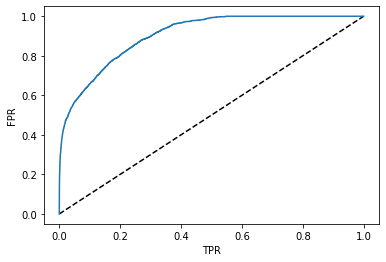

In [23]:
from sklearn.metrics import auc, roc_curve
print(auc)
y_pred_prob = model_cb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)

plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()



AUC for CatBoost

In [32]:
y_train_pred = model_cb.predict_proba(x_train)[:,1]
y_test_pred  = model_cb.predict_proba(x_test)[:,1]

AUC_train = roc_auc_score(y_train, y_train_pred)
AUC_test  = roc_auc_score(y_test, y_test_pred)

print('AUC_train:{:.4f} and AUC_test:{:.4f}'.format(AUC_train, AUC_test))

AUC_train:0.9178 and AUC_test:0.9045


In [ ]:
xgboost_simple = catboost.CatBoostClassifier()

In [ ]:
eval_set = [(x_test, y_test)]

xgboost_simple.fit(x_train,y_train, early_stopping_rounds = 10, eval_set = eval_set, verbose = True)

In [ ]:
sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)

In [ ]:

ROC Curve
Question: difference between ROC Curve and Confusion metrix
PR CURVE
Question: differenece between ROC curve and PR Curve
function ROC Curve

In [ ]:
Question:
Feutute Enginerring? We have multiple column for age, income and etc?
Correlation?
pd.plotting.scatter_matrix(features, c = labels, figsize=[10,10],s=50)  # How?
To do: 

In [ ]:
pd.plotting.scatter_matrix(features, c = labels, figsize=[10,10],s=50)

In [ ]:

What is the "gradient boosting techniques"?

In [ ]:
#for multiple modles we need a table for AUC, PR Curve 

In [ ]:

# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:

# make predictions using random forest for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=20, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-8.52381793,5.24451077,-12.14967704,-2.92949242,0.99314133,0.67326595,-0.38657932,1.27955683,-0.60712621,3.20807316,0.60504151,-1.38706415,8.92444588,-7.43027595,-2.33653219,1.10358169,0.21547782,1.05057966,0.6975331,0.26076035]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

In [ ]:
#Load Required librarys
import sklearn 

In [ ]:
#train model 1

In [ ]:
#Test model 1

In [ ]:
#evaluate model 1

In [ ]:
pwd

Misc

In [ ]:
# sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(10, 10)})
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.boxplot( y=app_rec["AMT_INCOME_TOTAL"] )
ax.set(xlabel='Income', ylabel='Dollar Value')



In [ ]:
# No need to create Bucket. It is better to keep it as numeric.
# Create 8 different bucket of Ages
# bins = [0, 20, 25,30,45,55,60, 65, 70]
# labels = [1,2,3,4,5,6,7,8]
# app_rec['AGE_BUKET'] = pd.cut(app_rec['AGE'], bins,labels=labels)
# app_rec['AGE_BUKET']

In [ ]:
# Create Count of Children bucket based on CNT_CHILDREN
# app_rec.CNT_CHILDREN.value_counts()

In [ ]:
# It Seems we have imbalanced data. What will be the next step to address this situation and avoid consequential issues? Question from Saeed: What should I do in this situation?
# Note from Saeed: the imbalance is a problem for label, not for features!

In [ ]:
# # should be changed to number
# app_rec.CNT_CHILDREN_BUCKET = app_rec.CNT_CHILDREN
# def conditions(i): 
#     if i ==0 : return '0'
#     if i ==1 : return "1"
#     if i ==2 : return '2'
#     if i ==3 : return '3'
#     if i ==4 : return '4'
#     if i >= 5: return '5'

# app_rec['CNT_CHILDREN_BUCKET']=app_rec['CNT_CHILDREN'].apply(conditions)


In [ ]:
cre_rec.STATUS.unique()
# 0: 1-29 days past due 
# 1: 30-59 days past due 
# 2: 60-89 days overdue 
# 3: 90-119 days overdue 
# 4: 120-149 days overdue 
# 5: Overdue or bad debts, write-offs for more than 150 days 
# C: paid off that month 
# X: No loan for the month

In [ ]:
CID = "5001757"
TID = -7
WL = 4

D_LABEL_AT_WL = list(cre_rec.loc[(cre_rec['ID'] == CID) & (cre_rec['MONTHS_BALANCE'] == (TID + WL)), 'BINARY_STATUS'])[0]
D_LABEL_AT_WL

In [ ]:
CID = "5001757"
TID = -8
Tlag = 4

LABEL        = list(cre_rec.loc[(cre_rec["ID"] == CID) & (cre_rec["MONTHS_BALANCE"] == (TID+Tlag)), "BINARY_STATUS"])[0]
LABEL

In [ ]:
from zipfile import LargeZipFile


Questions:
for loop for 0-12 month LargeZipFile
lets change some of the variables

In [ ]:
%%time
mydf = pd.DataFrame({"ID":[],"COUNT":[]})
myIDs = cre_rec.ID.unique()
for i in myIDs:
    count = cre_rec.loc[cre_rec["ID"]==i, "ID"].count()
    new_row = pd.DataFrame({"ID":[i], "COUNT":[count]})
    mydf = mydf.append(new_row)


In [ ]:
# Home Work 2 - 
from telnetlib import STATUS
from typing import Counter


Average
Count - Age of the account
Mean 
Max


Current STATUS
Window Length (6 & 12 Months)


In [ ]:
# # Use numpy to convert to arrays
# import numpy as np
# # Labels are the values we want to predict
# labels = np.array(data['LABEL'])
# # Remove the labels from the features
# # axis 1 refers to the columns
# features= data.drop([ 'LABEL'], axis = 1)
# # Saving feature names for later use
# feature_list = list(features.columns)
# # Convert to numpy array
# features = np.array(features)

In [ ]:
app_rec = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\application_record.csv')

In [ ]:
# Test

def resumetable(df):
    print(f"shape:", {df.shape})
    summary = pd.DataFrame(df.dtypes,columns= ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name', 'dtypes']]
    summary["Unique"] = df.nunique().values
    summary['missing'] = df.isnull().sum().values
    summary['first Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary

result = resumetable(app_rec)
result